# Import Libraries

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
#Read Dataset
df=pd.read_csv('loan.csv')

/home/bhanu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Checking metdata

In [3]:
#check the datatypes of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
#check the columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
#check rows & columns
df.shape

(39717, 111)

# Data Cleaning

Fixing missing values

In [6]:
#identification null values by column
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#check the columns that are completely null
df.isnull().sum()[df.isnull().sum()==df.shape[0]]

mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717
bc_open_to_buy                    39717
bc_util                           39717


In [8]:
#Make a list of columns which are completely null
complete_null_column_list=list(pd.DataFrame(df.isnull().sum()[df.isnull().sum()==df.shape[0]]).index.values)

In [9]:
#Drop the columns that are completely null
df.drop(complete_null_column_list,axis=1,inplace=True)

In [10]:
#check again for nulls
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [11]:
#Drop additional columns that are mostly null
df.drop(['emp_title','desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1,inplace=True)

In [12]:
#Understand the emp_length column
print(df.emp_length.describe())

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object


In [13]:
# Fill Null values for emp_length
df=df[-df['emp_length'].isnull()]

In [14]:
#check again for nulls
df.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
title                          10
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util    

In [15]:
# check title column
df['title'].describe()

count                  38632
unique                 19148
top       Debt Consolidation
freq                    2144
Name: title, dtype: object

since title has more unique text values I am droping the column 

In [16]:
# drop title column
df.drop('title',axis=1,inplace=True)

In [17]:
df['revol_util'].describe()

count     38595
unique     1087
top          0%
freq        941
Name: revol_util, dtype: object

In [18]:
# dropping revol_util since this column is not much useful as the loan is already issued 

In [19]:
# understand collections_12_mths_ex_med column
df['collections_12_mths_ex_med'].describe()

count    38586.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [20]:
#understand collections_12_mths_ex_med column
df['chargeoff_within_12_mths'].describe()

count    38586.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [21]:
#understand pub_rec_bankruptcies column
df['pub_rec_bankruptcies'].describe()

count    37945.000000
mean         0.041560
std          0.200507
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [22]:
#understand tax_liens column
df['tax_liens'].describe()

count    38603.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [23]:
# Dropping collections_12_mths_ex_med, chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
df.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens'],axis=1,inplace=True)

since collections_12_mths_ex_med, chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens columns have mostly same value (0) it does make sense to include these variables for analysis

In [24]:
#dropping the columns
df.drop(['last_pymnt_d','last_credit_pull_d','revol_util'],axis=1,inplace=True)
# last payment date & last credit pull date are not useful as they are already paid dates

In [25]:
#check again for nulls
df.isnull().sum().sum()

0

In [26]:
df.shape

(38642, 44)

# Checking duplicates

In [27]:
#check for duplicates
df.drop_duplicates(inplace=True)

In [28]:
df.shape

(38642, 44)

No duplicate records found

In [29]:
# Remove columns whose values are same across all rows
df.drop(['pymnt_plan','application_type','acc_now_delinq','delinq_amnt','policy_code','initial_list_status'],inplace=True,axis=1)

In [30]:
#Remove unnecessary columns
df.drop(['id','url','zip_code'],axis=1,inplace=True)

In [31]:
df.home_ownership.value_counts()

RENT        18488
MORTGAGE    17212
OWN          2841
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

# Fixing outlier

In [32]:
# Removing Outliers in home_ownership column
df=df[df['home_ownership']!='NONE']

# Fixing invalid values

In [33]:
# formatting values
df['term']=list(map(lambda x :int(x.replace('months','').strip()),df.term))
df['int_rate']=list(map(lambda x :float(x.replace('%','')),df.int_rate))
df['int_rate_bin'] = pd.cut(df['int_rate'], [0, 10, 13, 15,20,25], labels=['0-10', '10-13', '13-15', '15-20','20+'])
df['emp_length_float']=list(map(lambda x :float(str(x).replace('<','').replace('+','').replace('year','').replace('s','')),df.emp_length))

In [34]:
#Creating new columns for analysis on loan issued date
df['issued_month']=pd.to_datetime(df['issue_d'],format='%b-%y').dt.month
df['issued_year']=pd.to_datetime(df['issue_d'],format='%b-%y').dt.year

In [35]:
#check again for nulls
df.isnull().sum()

member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amn

# Univariate Analysis

In [36]:
sns.set_style("darkgrid")

<Figure size 864x432 with 0 Axes>

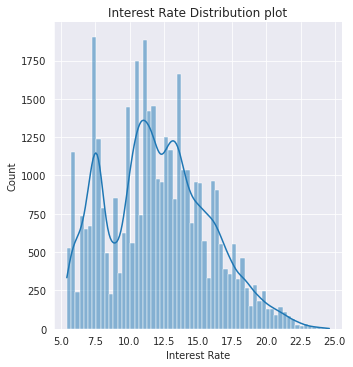

In [37]:
#Distribution plot on Interest Rate
plt.figure(figsize=(12,6))
sns.displot(x=df['int_rate'].astype('float'),kde=True)
plt.xlabel('Interest Rate')
plt.title('Interest Rate Distribution plot')
plt.show()

**Observation** <br>
Above distplot shows that most of the interest rates lies between 10-15 percent

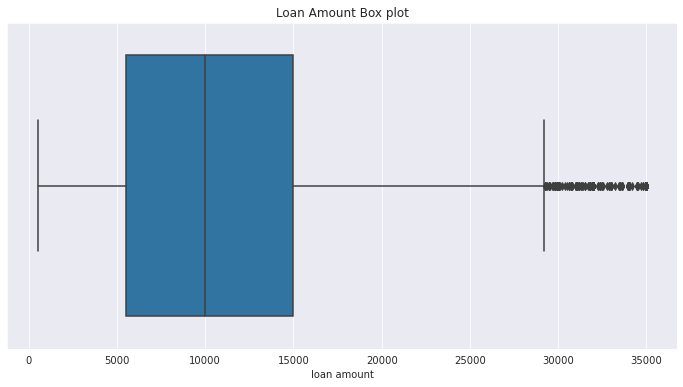

In [38]:
#Box plot on loan amount
plt.figure(figsize=(12,6))
fig=sns.boxplot(x=df['loan_amnt'].astype('float'))
plt.xlabel('loan amount')
plt.title('Loan Amount Box plot')
plt.show()

**Observation** <br>From the above boxplot it is clear that half of the borrowers applied loan for an amount of 10000 while least number of borrowers applied above 30000

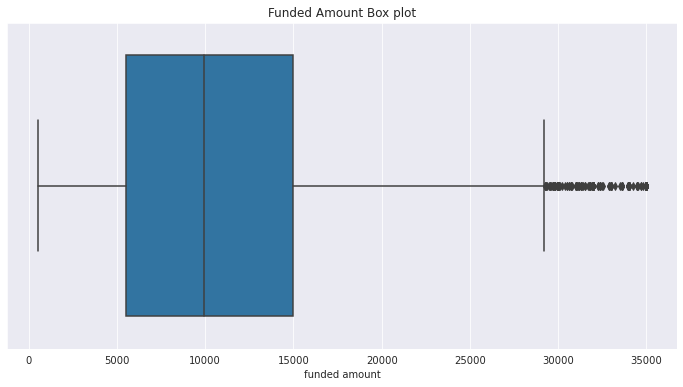

In [39]:
#Box plot on funded amount
plt.figure(figsize=(12,6))
fig=sns.boxplot(x=df['funded_amnt'].astype('float'))
plt.xlabel('funded amount')
plt.title('Funded Amount Box plot')
plt.show()

**Observation** <br>The boxplot shows that the values are nearly identical with respect to the loan amount

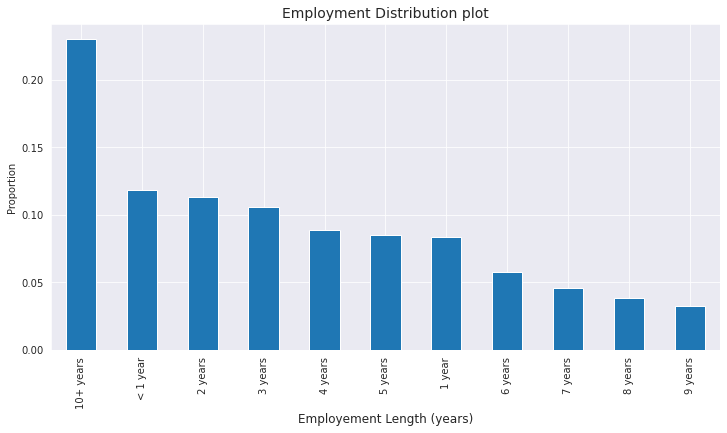

In [40]:
#Bar plot on funded amount
plt.figure(figsize=(12,6))
df.emp_length.value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Employement Length (years)",fontsize=12)
plt.ylabel('Proportion')
plt.title("Employment Distribution plot",fontsize=14)
plt.show()

**Observation** <br>The distribution plot shows that most of the borrowers who took loan has more than 10 years of employment history 

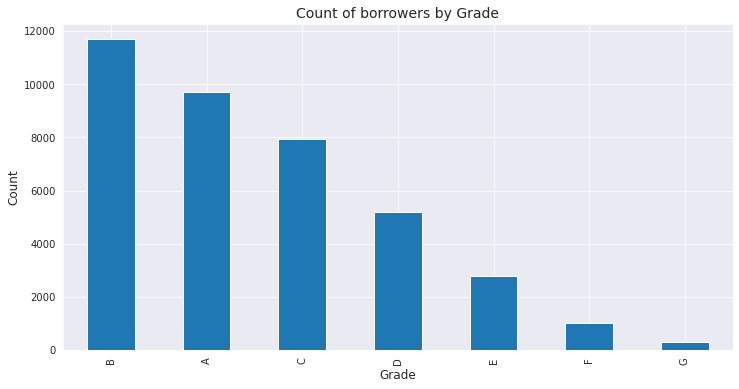

In [41]:
# Bar plot on Grade
plt.figure(figsize=(12,6))
df.grade.value_counts().plot(kind='bar')
plt.xlabel("Grade",fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title("Count of borrowers by Grade",fontsize=14)
plt.show()

**Observation** <br>The above bar plot shows that most of borrowers are given B grade while least number of borrowers are given G grade.

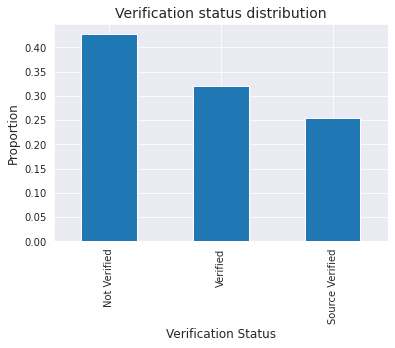

In [42]:
df.verification_status.value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Verification Status",fontsize=12)
plt.ylabel('Proportion',fontsize=12)
plt.title("Verification status distribution",fontsize=14)
plt.show()

**Observation:** <br>The above bar plot shows that 42% are not verified,32% are verified and 25% are source verified

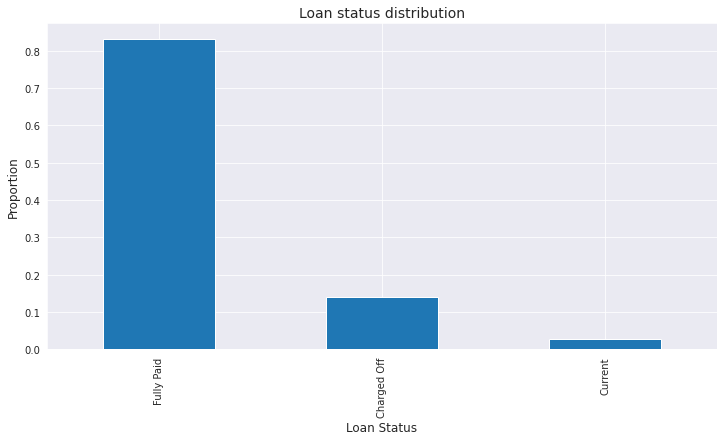

In [43]:
plt.figure(figsize=(12,6))
df.loan_status.value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Loan Status",fontsize=12)
plt.ylabel('Proportion',fontsize=12)
plt.title("Loan status distribution",fontsize=14)
plt.show()

**Observation:** <br> around 83% borrowers are fully paid and 14% are charged-off

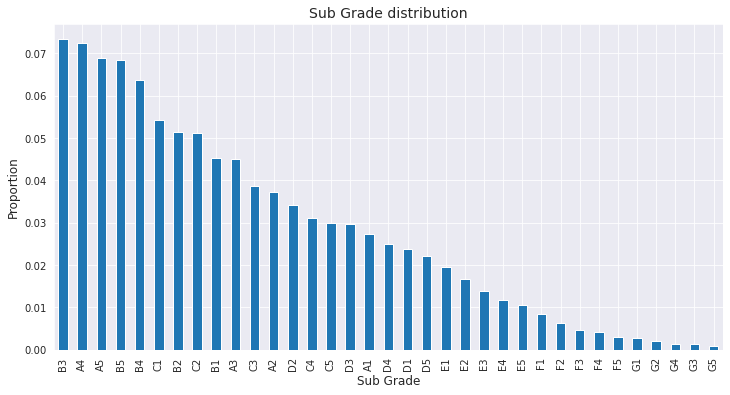

In [44]:
plt.figure(figsize=(12,6))
df.sub_grade.value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Sub Grade",fontsize=12)
plt.ylabel('Proportion',fontsize=12)
plt.title("Sub Grade distribution",fontsize=14)
plt.show()

**Observation:** <br> Most of the borrowers fall under B3 sub-grade and least fall under G5

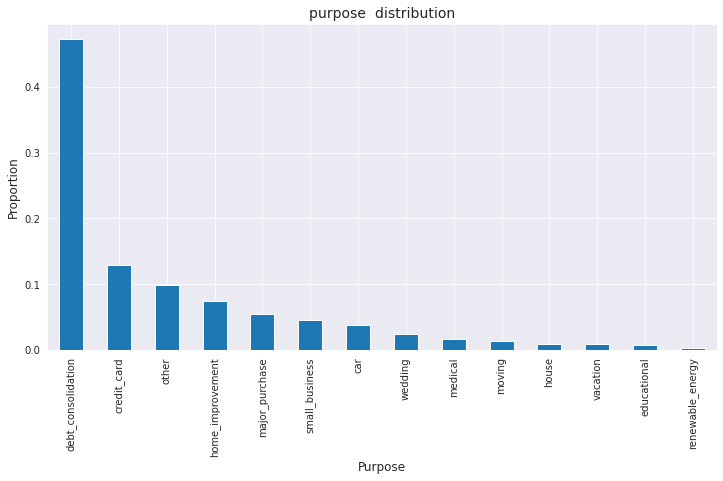

In [45]:
plt.figure(figsize=(12,6))
df.purpose.value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Purpose",fontsize=12)
plt.ylabel('Proportion',fontsize=12)
plt.title("purpose  distribution",fontsize=14)
plt.show()

**Observation** <br>Majority of borrowers applied loan for the purpose of debt_consolidation and renewable_energy is the least applied

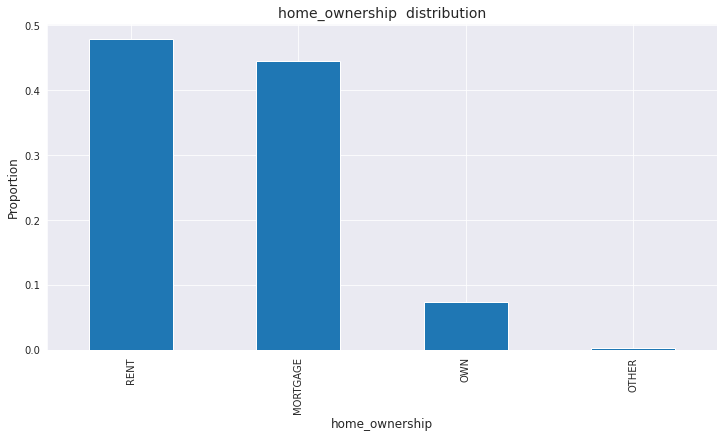

In [46]:
plt.figure(figsize=(12,6))
df.home_ownership.value_counts(normalize=True).plot(kind='bar')
plt.xlabel("home_ownership",fontsize=12)
plt.ylabel('Proportion',fontsize=12)
plt.title("home_ownership  distribution",fontsize=14)
plt.show()

**Observation** <br>Most of the borrowers has RENT &  MORTAGAGE houses

# Segmented Analysis

In [47]:
charged_off_df=df[df['loan_status']=='Charged Off']
non_charged_off=df[df['loan_status']=='Fully Paid']

In [48]:
charged_off_df.groupby('emp_length').count()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,int_rate_bin,emp_length_float,issued_month,issued_year
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,456,456,456,456,456,456,456,456,456,456,...,456,456,456,456,456,456,456,456,456,456
10+ years,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,...,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331
2 years,567,567,567,567,567,567,567,567,567,567,...,567,567,567,567,567,567,567,567,567,567
3 years,555,555,555,555,555,555,555,555,555,555,...,555,555,555,555,555,555,555,555,555,555
4 years,462,462,462,462,462,462,462,462,462,462,...,462,462,462,462,462,462,462,462,462,462
5 years,458,458,458,458,458,458,458,458,458,458,...,458,458,458,458,458,458,458,458,458,458
6 years,307,307,307,307,307,307,307,307,307,307,...,307,307,307,307,307,307,307,307,307,307
7 years,263,263,263,263,263,263,263,263,263,263,...,263,263,263,263,263,263,263,263,263,263
8 years,203,203,203,203,203,203,203,203,203,203,...,203,203,203,203,203,203,203,203,203,203


<Figure size 864x432 with 0 Axes>

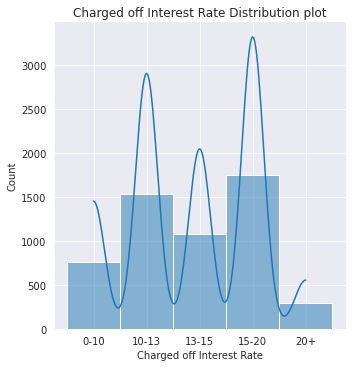

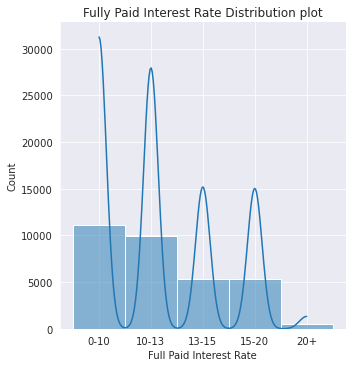

In [49]:
plt.figure(figsize=(12,6))
sns.displot(x=charged_off_df['int_rate_bin'],kde=True)
plt.xlabel('Charged off Interest Rate')
plt.title('Charged off Interest Rate Distribution plot')
sns.displot(x=non_charged_off['int_rate_bin'],kde=True)
plt.xlabel('Full Paid Interest Rate')
plt.title('Fully Paid Interest Rate Distribution plot')
plt.show()

**Observation:** <br> Most of the borrowers who are charged-off are the ones who pay interest rates between 15-20% and Fully paid borrowers are mostly having interest rates below 10%

<Figure size 864x432 with 0 Axes>

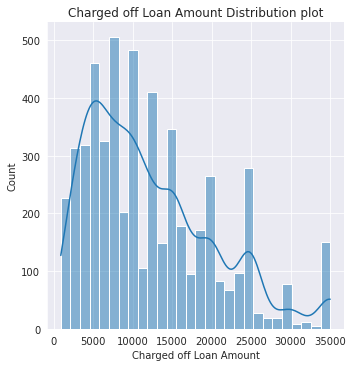

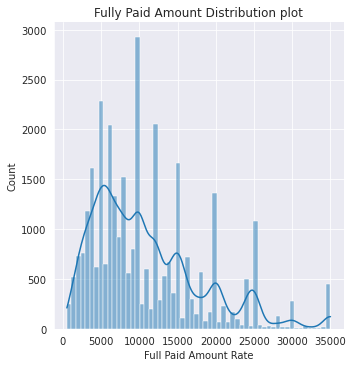

In [50]:
plt.figure(figsize=(12,6))
sns.displot(x=charged_off_df['loan_amnt'],kde=True)
plt.xlabel('Charged off Loan Amount')
plt.title('Charged off Loan Amount Distribution plot')
sns.displot(x=non_charged_off['loan_amnt'],kde=True)
plt.xlabel('Full Paid Amount Rate')
plt.title('Fully Paid Amount Distribution plot')
plt.show()

**Observation:** <br> Most of the charged-off borrowers applied for loan amount around 5000-10000 and fully paid borrowers applied mostly for 10000 amount

Text(0.5, 1.0, 'Fully Paid Funded Amount Distribution plot')

<Figure size 864x432 with 0 Axes>

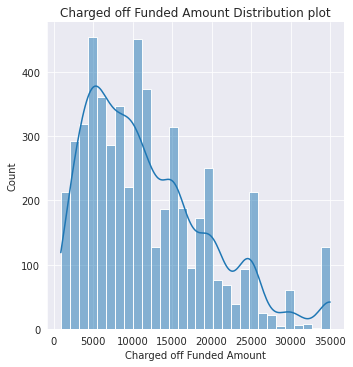

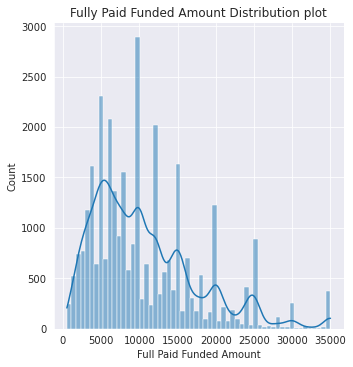

In [51]:
plt.figure(figsize=(12,6))
sns.displot(x=charged_off_df['funded_amnt'],kde=True)
plt.xlabel('Charged off Funded Amount')
plt.title('Charged off Funded Amount Distribution plot')
sns.displot(x=non_charged_off['funded_amnt'],kde=True)
plt.xlabel('Full Paid Funded Amount')
plt.title('Fully Paid Funded Amount Distribution plot')

**Observation:** <br> Funded amount of charged-off and fully-paid borrowers follow similar pattern wrt loan amount

# Bivariate Analysis

Text(0.5, 1.0, 'loan amnt vs purpose')

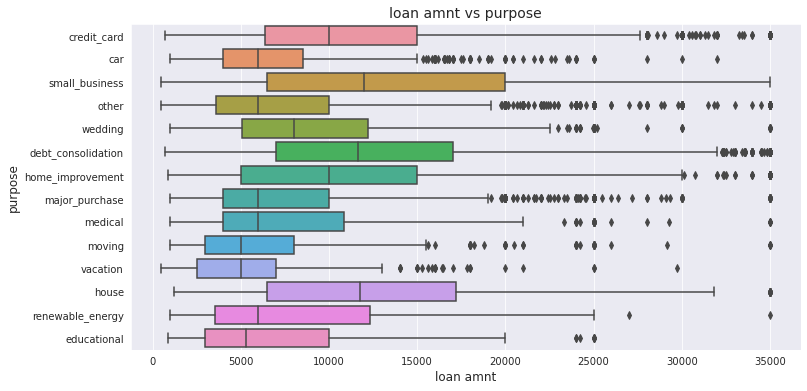

In [52]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x=df.loan_amnt,y=df.purpose)
ax.set_xlabel('loan amnt',fontsize=12)
ax.set_ylabel('purpose',fontsize=12)
ax.set_title("loan amnt vs purpose",fontsize=14)

**Observation** <br>Above boxplot shows small business has highest proprotion of loan sactioned, while vacation has least amount sactioned. Small Business house, renewable_energy and educational loans have less number of outliers

Text(0.5, 1.0, 'loan amnt vs home ownership')

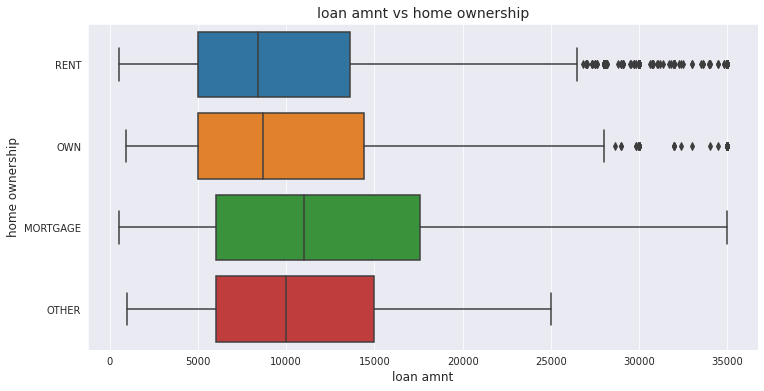

In [53]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x=df.loan_amnt,y=df.home_ownership)
ax.set_xlabel('loan amnt',fontsize=12)
ax.set_ylabel('home ownership',fontsize=12)
ax.set_title("loan amnt vs home ownership",fontsize=14)

**Observation** <br>Mortgage borrowers have highest median value for loan amount while RENT & OWN house borrowers has similar loan amount

Text(0.5, 1.0, 'int rate vs purpose')

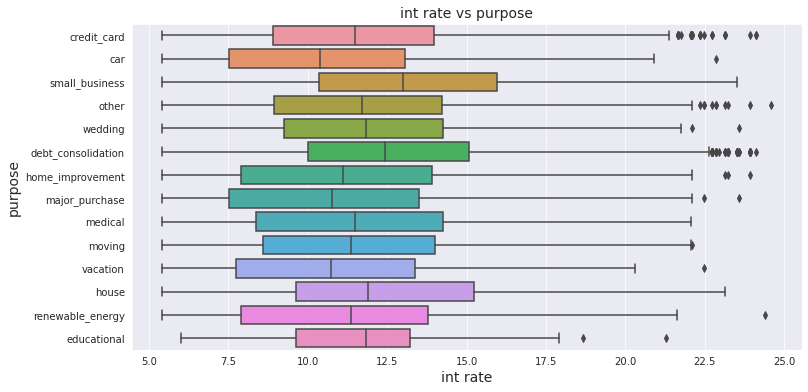

In [54]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(y=df.purpose,x=df.int_rate.astype('float'))
ax.set_xlabel('int rate',fontsize=14)
ax.set_ylabel('purpose',fontsize=14)
ax.set_title("int rate vs purpose",fontsize=14)

**Observation** <br>Interest Rates are higher for small_business followed by house loan and car loan has the lower interest rate compared to other loans

Text(0.5, 1.0, 'int rate vs loan status')

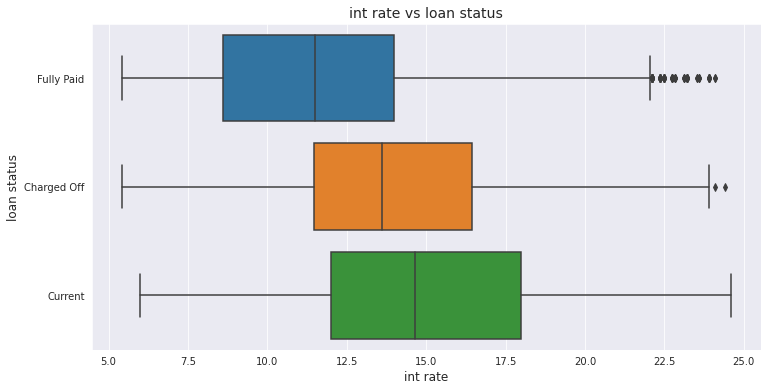

In [55]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(y=df.loan_status,x=df.int_rate.astype('float'))
ax.set_xlabel('int rate',fontsize=12)
ax.set_ylabel('loan status',fontsize=12)
ax.set_title("int rate vs loan status",fontsize=14)

**Observation** <br>Borrowers whose loan have less intrest rates are the ones who fully paid the loan

Text(0.5, 1.0, 'issued year vs funded amnt')

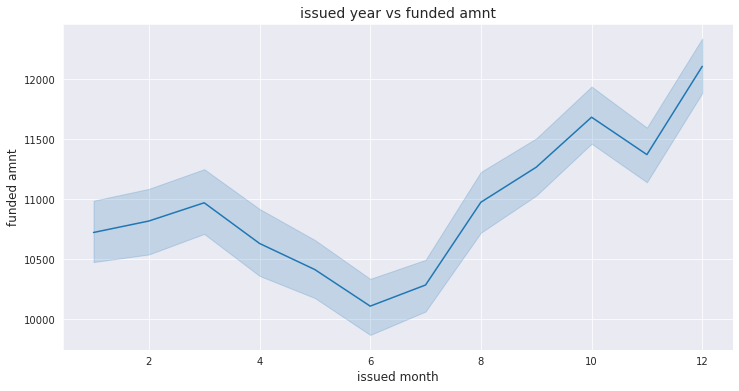

In [56]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(x=df.issued_month,y=df.funded_amnt)
ax.set_xlabel('issued month',fontsize=12)
ax.set_ylabel('funded amnt',fontsize=12)
ax.set_title("issued year vs funded amnt",fontsize=14)

**Observation:** <br>Highest number of loans were funded mostyle in the month of December and least in the month of June

Text(0.5, 1.0, 'issued year vs funded amnt')

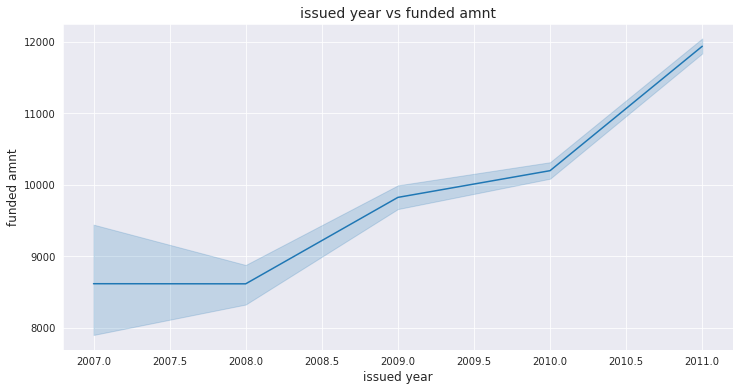

In [57]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(x=df.issued_year,y=df.funded_amnt)
ax.set_xlabel('issued year',fontsize=12)
ax.set_ylabel('funded amnt',fontsize=12)
ax.set_title("issued year vs funded amnt",fontsize=14)

**Observation** <br>Amount funded has increased gradually from the year 2007 to 2011

Text(0.5, 1.0, 'issued year vs term')

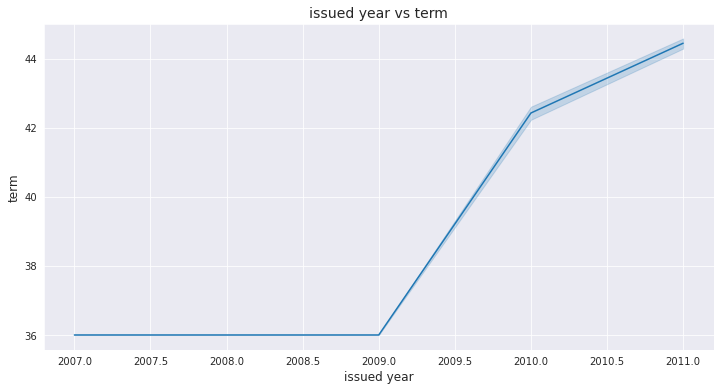

In [58]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(x=df.issued_year,y=df.term)
ax.set_xlabel('issued year',fontsize=12)
ax.set_ylabel('term',fontsize=12)
ax.set_title("issued year vs term",fontsize=14)

**Observation** <br>The term period of the borrowers increased gradually from the year 2009 as amount funded increased as shown in previous lineplot

Text(0.5, 1.0, 'issued year vs annual imcome')

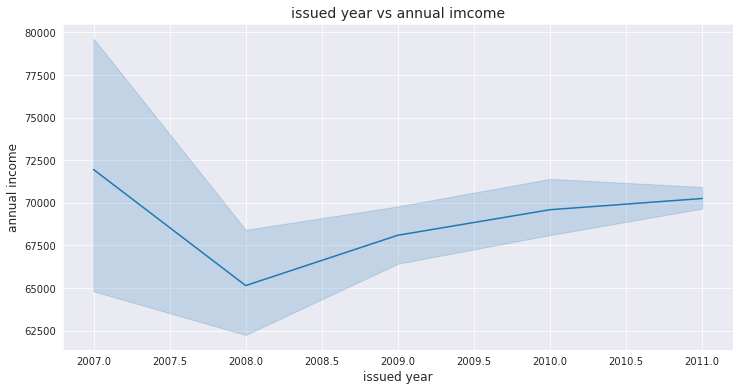

In [59]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(x=df.issued_year,y=df.annual_inc)
ax.set_xlabel('issued year',fontsize=12)
ax.set_ylabel('annual income',fontsize=12)
ax.set_title("issued year vs annual imcome",fontsize=14)

**Observation** <br>Annual income of the borrowers slightly dipped by the end of 2007 and gradually increased till 2011

Text(0.5, 1.0, 'issued year vs int rate')

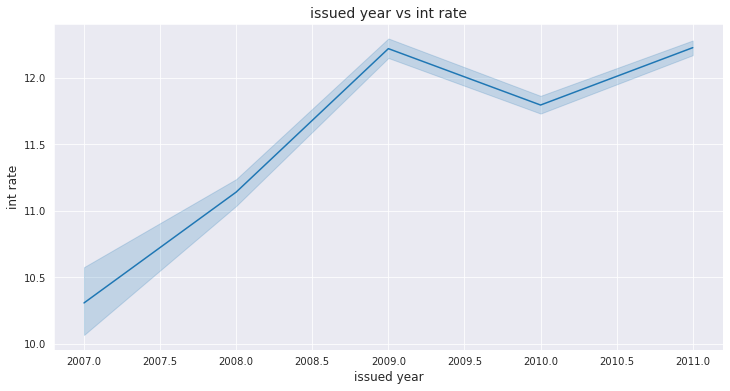

In [60]:
plt.figure(figsize=(12,6))
df['int_rate_rounded']=list(map(lambda x : round(float(x)),df.int_rate))
ax=sns.lineplot(x=df.issued_year,y=df.int_rate_rounded)
ax.set_xlabel('issued year',fontsize=12)
ax.set_ylabel('int rate',fontsize=12)
ax.set_title("issued year vs int rate",fontsize=14)

**Observation** <br>Above lineplot shows that interest rates are increasing year by year starting from 2007 with slight decline in the year 2010.

Text(0.5, 1.0, 'Addr state vs loan amnt')

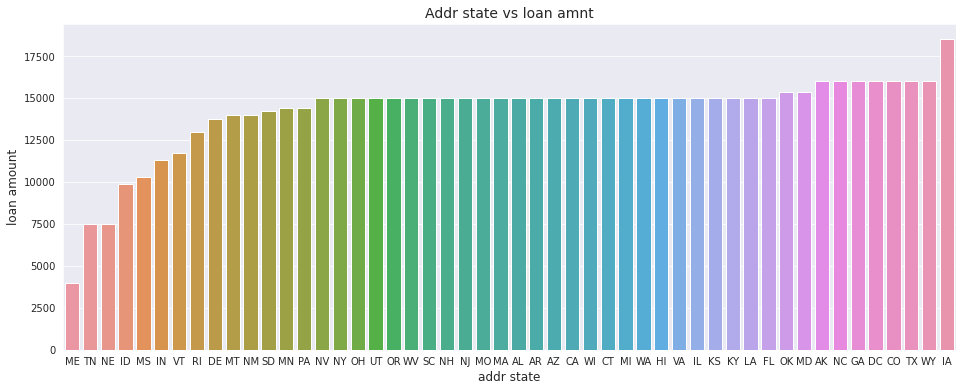

In [61]:
plt.figure(figsize=(16,6))
ax=sns.barplot(data=df[['loan_amnt','addr_state']].groupby('addr_state').quantile(.75).reset_index().sort_values('loan_amnt'),y='loan_amnt',x='addr_state')
ax.set_xlabel('addr state',fontsize=12)
ax.set_ylabel('loan amount',fontsize=12)
ax.set_title("Addr state vs loan amnt",fontsize=14)

**Observation** <br>Most of the Borrowers from ME State applied a less amount of loan and AK state borrowers applied highest amount of loan

Text(0.5, 1.0, 'Interest Rates vs grades')

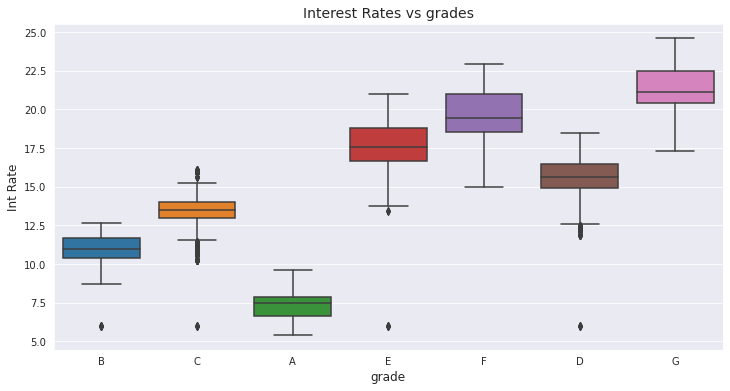

In [62]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x=df.grade,y=df.int_rate.astype('float'))
ax.set_xlabel('grade',fontsize=12)
ax.set_ylabel('Int Rate',fontsize=12)
ax.set_title("Interest Rates vs grades",fontsize=14)

**Observation** <br>Borrowers with grade G are paying highest Interest rates and grade A borrowers paying low interest rates

Text(0.5, 1.0, 'Interest Rates vs Subgrade')

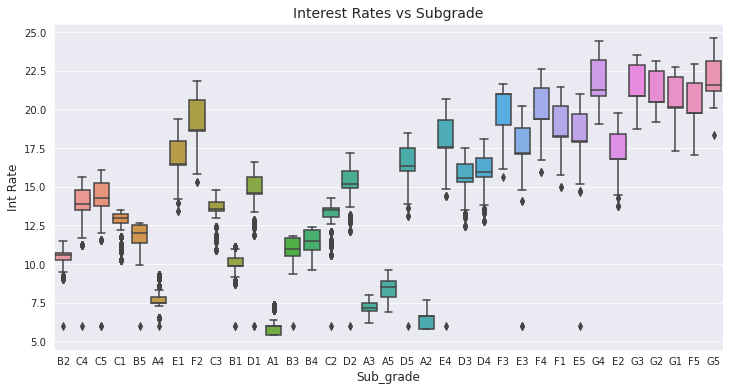

In [63]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x=df.sub_grade,y=df.int_rate.astype('float'))
ax.set_xlabel('Sub_grade',fontsize=12)
ax.set_ylabel('Int Rate',fontsize=12)
ax.set_title("Interest Rates vs Subgrade",fontsize=14)

**Observation** <br>Borrowers with sub grade G4 & G5 are paying higher interest rates where as A1, A2 grade borrowers paying low interest rates

Text(0.5, 1.0, 'Term vs Interest rate')

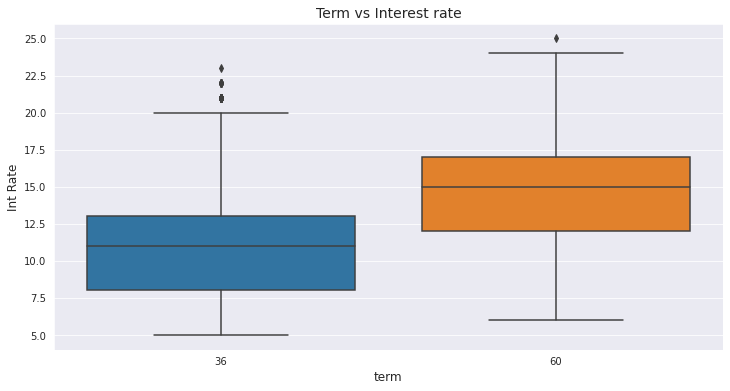

In [64]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x=df.term,y=df.int_rate_rounded)
ax.set_xlabel('term',fontsize=12)
ax.set_ylabel('Int Rate',fontsize=12)
ax.set_title("Term vs Interest rate",fontsize=14)

**Observation** <br>borrowers who opted 60 months period are having the higher interest rates compared to 36 months

Text(0.5, 1.0, 'Heatmap')

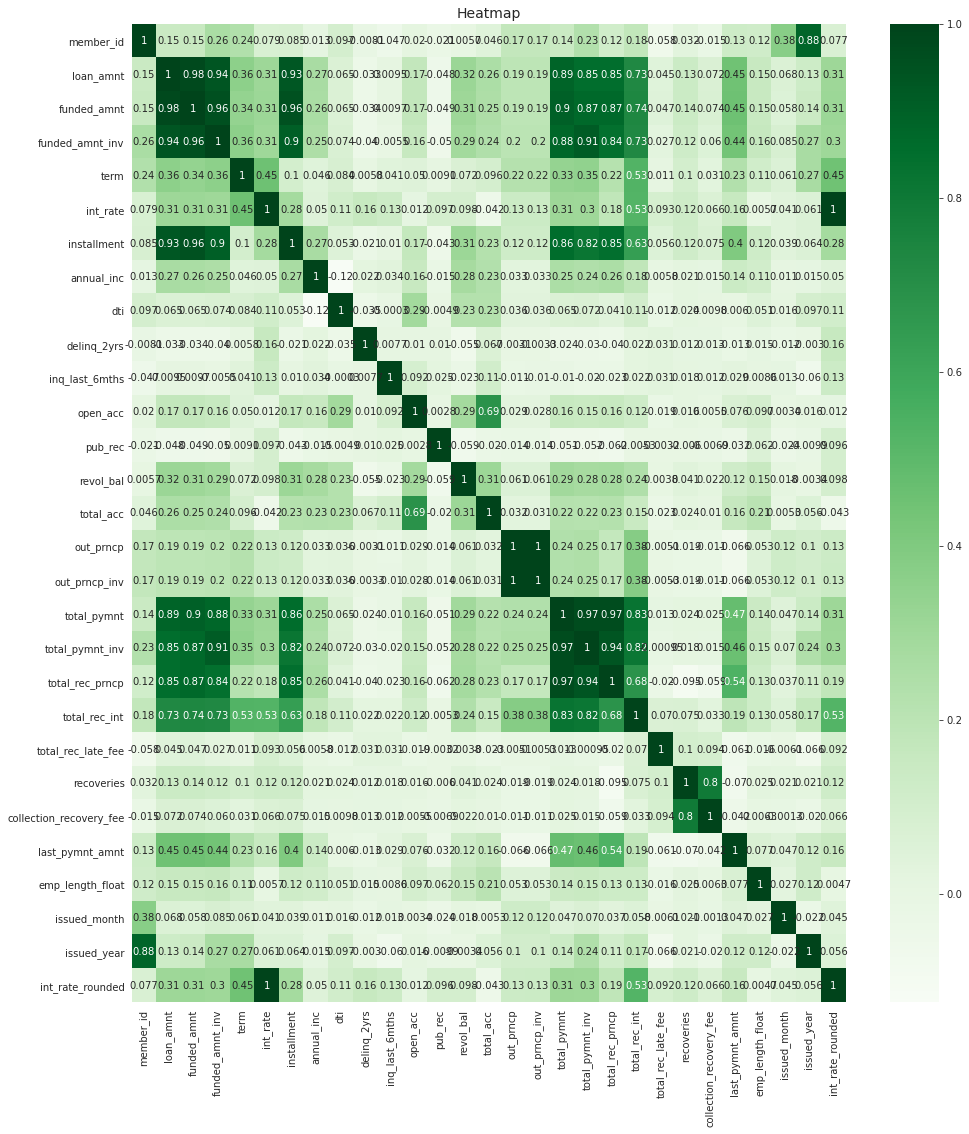

In [65]:
plt.figure(figsize=(16,18))
ax=sns.heatmap(df.corr(),cmap='Greens',annot=True)
ax.set_title('Heatmap',fontsize=14)

**Observation** <br>Above heatmap shows strong positive correlation with loan_amnt,funded_amnt,funded_amnt_inv,installment,total_payment